# Twin Primes

https://www.youtube.com/watch?v=n4gmYjyI3vo

In [1]:
using DataStructures
using Plots

In [2]:
function digital_root(twins::Tuple{Int64, Int64}, print_steps=false)::Tuple{Int64, Int64}
    """
    Returns the digital root of a tuple of twin primes
    Set print_steps to true to print the calculation steps to screen
    """
    product = Int128(twins[1]) * Int128(twins[2])
    number_of_digits = -1 # initiate variable
    digitalroot = product
    steps = 0
    if print_steps
        println("Twin Primes : $twins")
        println("Product     : $product")
    end
    while number_of_digits != 1
        steps += 1
        digitalroot = sum([parse(Int128, digit) for digit in string(digitalroot)])
        if print_steps
            println("Step $steps      : $digitalroot")
        end
        number_of_digits = length(string(digitalroot))
    end
    return digitalroot, steps
end

digital_root (generic function with 2 methods)

In [3]:
# Demo
digital_root((17, 19), true);

Twin Primes : (17, 19)
Product     : 323
Step 1      : 8


In [4]:
# Demo
digital_root((101, 103), true);

Twin Primes : (101, 103)
Product     : 10403
Step 1      : 8


In [5]:
# Demo
digital_root((881, 883), true);

Twin Primes : (881, 883)
Product     : 777923
Step 1      : 35
Step 2      : 8


In [6]:
# Demo
digital_root((881, 883))

(8, 2)

In [7]:
function Primes(n::Int64)::Vector{Int64}
    """
    Generates a vector of all primes in the range 1 to n (included)
    """
    A = BitArray(trues(n)) # array with results
    A[1] = false # 1 is not a prime
    candidate = 2
    while candidate <= sqrt(n)
        for i in candidate:(n ÷ candidate)
            A[i * candidate] = false
        end
        candidate += 1
        while candidate <= n && A[candidate] == false
            candidate += 1
        end
    end
    findall(x -> x != false, A)
end

Primes (generic function with 1 method)

In [8]:
# Setup maximum number to find primes in range 1 to n (included)
n = 10^9;

In [9]:
# Generate primes
primes = Primes(n)[3:end] # leave out corner cases 2 and 3

50847532-element Vector{Int64}:
         5
         7
        11
        13
        17
        19
        23
        29
        31
        37
         ⋮
 999999739
 999999751
 999999757
 999999761
 999999797
 999999883
 999999893
 999999929
 999999937

In [10]:
function twins(primes::Vector{Int64})::Vector{Tuple{Int64, Int64}}
    """
    Returns a vector of twin prime paires bases of an input vector of primes
    """
    twin_primes = Vector{Tuple{Int64, Int64}}()
    for i in 1:(length(primes)-1)
        if primes[i+1] - primes[i] == 2
            push!(twin_primes, (primes[i], primes[i+1]))
        end
    end
    return twin_primes
end

twins (generic function with 1 method)

In [11]:
# Twin Primes
tp = twins(primes)
primes = nothing # 'delete' primes to free up memory
GC.gc() # run garbage collector
tp

3424505-element Vector{Tuple{Int64, Int64}}:
 (5, 7)
 (11, 13)
 (17, 19)
 (29, 31)
 (41, 43)
 (59, 61)
 (71, 73)
 (101, 103)
 (107, 109)
 (137, 139)
 ⋮
 (999996071, 999996073)
 (999996707, 999996709)
 (999997769, 999997771)
 (999998141, 999998143)
 (999998507, 999998509)
 (999998639, 999998641)
 (999998687, 999998689)
 (999998957, 999998959)
 (999999191, 999999193)

In [12]:
# Digital Root and Number of Steps for all Twin Primes
drtp = digital_root.(tp)

3424505-element Vector{Tuple{Int64, Int64}}:
 (8, 1)
 (8, 1)
 (8, 1)
 (8, 2)
 (8, 2)
 (8, 2)
 (8, 2)
 (8, 1)
 (8, 2)
 (8, 2)
 ⋮
 (8, 3)
 (8, 3)
 (8, 2)
 (8, 3)
 (8, 2)
 (8, 2)
 (8, 3)
 (8, 3)
 (8, 3)

In [13]:
# Number of cases where the digital root of twin primes is not equal to 8
validate = BitArray(falses(length(drtp)))
for i in 1:length(drtp)
    if drtp[i][1] != 8
        validate[i] = true
    end
end
sum(validate)

0

In [14]:
# Step counts
counts = counter([i[2] for i in drtp])

Accumulator{Int64, Int64} with 3 entries:
  2 => 2362149
  3 => 1062351
  1 => 5

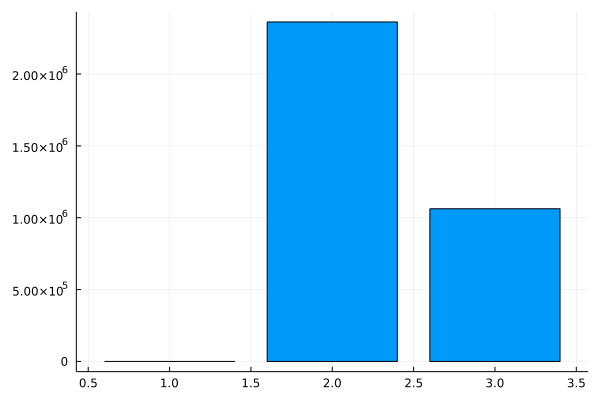

In [15]:
# Step counts
bar(counts, label=false)

In [16]:
# First occurence of 3 steps (in twin primes vector)
digital_root(tp[findall(x -> x == (8, 3), drtp)[begin]], true);

Twin Primes : (419999, 420001)
Product     : 176399999999
Step 1      : 89
Step 2      : 17
Step 3      : 8


In [17]:
# Last occurence of 3 steps (in twin primes vector)
digital_root(tp[findall(x -> x == (8, 3), drtp)[end]], true);

Twin Primes : (999999191, 999999193)
Product     : 999998384000652863
Step 1      : 98
Step 2      : 17
Step 3      : 8
